In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
base_dir = "./datasets/bb-14/train"

In [3]:
mask_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".txt"):
            mask_paths.append(os.path.join(root, file))

In [4]:
image_and_paths = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            image = Image.open(image_path)
            #mask_path = os.path.join(base_path, image_path.split("/")[2], "labels", os.path.basename(image_path).replace(".jpg", ".txt"))
            mask_path = os.path.join(base_dir, "labels", os.path.basename(image_path).replace(".jpg", ".txt"))
            try:
                with open(mask_path, "r") as mask_file:
                    lines = mask_file.readlines()
                    empty = len(lines) == 0
                    image_and_paths.append((image, lines, file, empty))
            except FileNotFoundError:
                print(f"File not found: {mask_path}")
                lines = []
                empty = True
                image_and_paths.append((image, lines, file, empty))

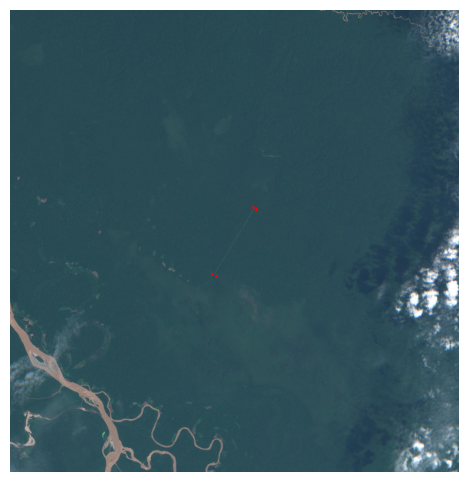

In [5]:
from matplotlib import pyplot as plt
image, data, file, empty = image_and_paths[5]

# Convert PIL Image to NumPy array
img_array = np.array(image)

# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.imshow(img_array)
plt.axis('off')  # Hide axis

# Parse the data string to extract coordinates
points = data[0].strip().split()

# Assuming the first element is a label, skip it
coords = points[1:]

# Ensure that there is an even number of coordinates
if len(coords) % 2 != 0:
    raise ValueError(f"Odd number of coordinates in data: {data}")

# Extract x and y coordinates, scaling them by crop_size
x_coords = []
y_coords = []
for i in range(0, len(coords), 2):
    x = float(coords[i]) * img_array.shape[1]
    y = float(coords[i+1]) * img_array.shape[0]
    x_coords.append(x)
    y_coords.append(y)

# Plot the points on the image
plt.scatter(x_coords, y_coords, c="red", s=1, marker='o', edgecolors='red')

# Optionally, add titles or annotations
plt.show()

In [6]:
min_x = min(x_coords)
max_x = max(x_coords)
min_y = min(y_coords)
max_y = max(y_coords)

# Calculate the width and height of the bounding box
width = max_x - min_x
height = max_y - min_y

# Calculate the center of the bounding box
center_x = min_x + width / 2
center_y = min_y + height / 2

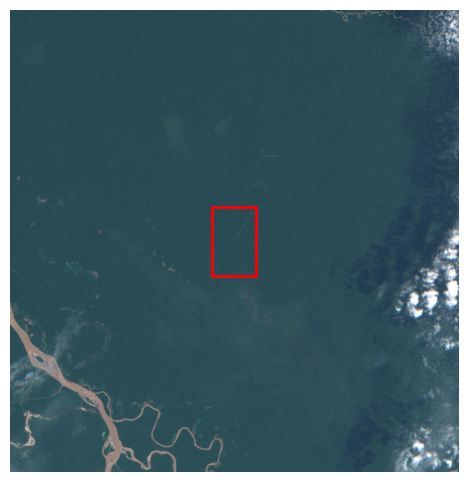

In [7]:
# Create a Matplotlib figure and axis
plt.figure(figsize=(8, 6))
plt.imshow(img_array)
plt.axis('off')  # Hide axis

plt.gca().add_patch(plt.Rectangle((min_x, min_y), width, height, linewidth=2, edgecolor='r', facecolor='none'))
plt.show()

In [8]:
base_path = base_dir + '/labels'

In [9]:
paths = os.listdir(base_path)

In [10]:
def get_rectangle_and_center(points):
    points_array = np.array(points).reshape(-1, 2)
    
    top_left = np.min(points_array, axis=0)
    bottom_right = np.max(points_array, axis=0)
    width = bottom_right[0] - top_left[0]
    height = bottom_right[1] - top_left[1]

    center_x = (top_left[0] + bottom_right[0]) / 2
    center_y = (top_left[1] + bottom_right[1]) / 2

    print(center_x, center_y, width, height)
    return [center_x, center_y, width, height]

In [11]:
for file in paths[1:]:
    file_path = os.path.join(base_path, file)
    with open(file_path, 'r') as f:
        lines = f.readlines()
    string = ""
    for line in lines:
        points = line.strip().split()
        points = list(map(float, points))
        result = get_rectangle_and_center(points[1:])
        string += f"0 {result[0]} {result[1]} {result[2]} {result[3]}\n"
    with open(file_path, 'w') as f:
        f.write(string)

0.4678004651386527 0.5005000168707411 0.07663846318302331 0.011017446053411428
0.358411539585605 0.7460822982236505 0.0385970712561407 0.06840827950770456
0.4797316507663846 0.5408000678955295 0.034621956297569256 0.062283620540216855
0.49856598760936 0.4984904209682669 0.14043771450382075 0.03705460351986806
0.49809881323053024 0.5048685872081582 0.15834677404566355 0.08540668937690288
0.5014325160624925 0.49461597589027506 0.025794278890137745 0.14668633774380635
0.13139982050379712 0.10418654891234096 0.08878406939964556 0.06734582232402778
0.4939065446209251 0.5012591045918589 0.14344023716897736 0.038211921145411554
0.6887780144973958 0.4994324726066526 0.0732146056871501 0.13192157164062768
0.49356332466143055 0.5038056984794174 0.09333430920248464 0.051113869743104556
0.4497694136879363 0.3897593130745396 0.029657418175728922 0.05356056354531652
0.44025725776191516 0.5472254685315401 0.045194845112850324 0.12520220752571354
0.46097372177370544 0.25628283921765715 0.0615020535922

In [59]:
# import re
# for root, dirs, files in os.walk("./seg-converted-bb"):
#     for file in files:
#         if file.endswith(".txt"):
#             file_path = os.path.join(root, file)
#             with open(file_path, 'r') as file:
#                 content = file.read()
#             new_content = re.sub(r'(\d+\.\d+)(\d+\.\d+)', r'\1\n0 \2', content)